#### This poject is adapted from PyTorch "TRAINING A CLASSIFIER" tutorial
#### URL: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

#### 1. Load and normalize data

In [1]:
import torch

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [2]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# TODO: fine tuning 
# crop size
# RandomHorizontalFlip: data augmentation technique
# Normalize value...
transform = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
            ])

# TODO: batch size
batch_size = 4

trainset = ImageFolder(root='./Training/Images/', transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

# testset = ImageFolder(root='./test_set/', transform=transform)
# testloader = DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

# TODO: change constantly
number_of_classes = 10
classes = [str(i) for i in range(number_of_classes)]  # Generates a list from '0' to '42'


/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#### show some training images 

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


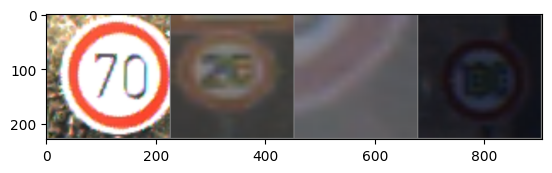

4     0     4     7    


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#### 2. Define a Convolutional Neural Network

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # no idea where to 44944 except errors
        self.fc1 = nn.Linear(44944, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, number_of_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#### 3. Define a Loss function and optimizer

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### 4. Train the network

In [6]:
# to GPU

net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=44944, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [11]:
# for epoch in range(2):  # loop over the dataset multiple times

running_loss = 0.0
for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    # inputs, labels = data
    # move to GPU
    inputs, labels = data[0].to(device), data[1].to(device)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    # print every n mini-batches
    n = len(trainset) // batch_size
    if i % n == (n-1):    
        # print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / n:.3f}')
        print(f'[{i + 1:5d}] loss: {running_loss / n:.3f}')
        running_loss = 0.0

print('Finished Training')

In [16]:
# save
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

#### 5. Test the network on the test data

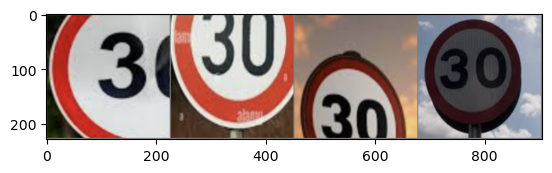

In [27]:
testset = ImageFolder(root='./test_set/', transform=transform)
testloader = DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

dataiter = iter(testloader)
images, labels = next(dataiter) # no labels just for the next line to work somehow...

# print images
imshow(torchvision.utils.make_grid(images))


In [24]:
# nn predict

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  30    30    30    30   


#### 6. whole dataset

#### train on gpu

In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [ ]:
print("hello")